In [7]:
import torch

X_train = torch.load('/Users/dilankaraguler/Desktop/cmse802_project/data/QM9/processed/X_train.pt')
y_train = torch.load('/Users/dilankaraguler/Desktop/cmse802_project/data/QM9/processed/y_train.pt')
X_test = torch.load('/Users/dilankaraguler/Desktop/cmse802_project/data/QM9/processed/X_test.pt')
y_test = torch.load('/Users/dilankaraguler/Desktop/cmse802_project/data/QM9/processed/y_test.pt')


/var/folders/0f/4zff17dd2819s0w6q2xfg0200000gn/T/ipykernel_28798/178166201.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X_train = torch.load('/Users/dilankaraguler/De

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),  # Input layer with 6 features
    Dense(128, activation='relu'),                  # Hidden layer 1
    Dense(64, activation='relu'),                   # Hidden layer 2
    Dense(17, activation='linear')                  # Output layer with 17 continuous values
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',           # Use mean_absolute_error if preferred
              metrics=['mae'])                     # Evaluate with Mean Absolute Error

# Summary of the model
model.summary()


/opt/anaconda3/envs/cmse802/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 17)             │         1,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,129 (70.82 KB)

 Trainable params: 18,129 (70.82 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
for i in range(len(y_train[1])):
    
    model.fit(X_train, y_train[:,i].reshape(-1, 1), epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2476 - mae: 0.4119 - val_loss: 0.1075 - val_mae: 0.2690
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1042 - mae: 0.2694 - val_loss: 0.0800 - val_mae: 0.2360
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0861 - mae: 0.2478 - val_loss: 0.0808 - val_mae: 0.2394
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0869 - mae: 0.2512 - val_loss: 0.0822 - val_mae: 0.2419
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0798 - mae: 0.2383 - val_loss: 0.0790 - val_mae: 0.2374
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0804 - mae: 0.2413 - val_loss: 0.0753 - val_mae: 0.2308
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0813 - mae: 0.2410 - val_loss: 0.0762 - val_mae: 0.2340
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0828 - mae: 0.2463 - val_loss: 0.0765 - val_mae: 0.2349
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0838 - mae: 

In [10]:

num_variables = y_test.shape[1]

# Initialize lists to store losses and MAEs for each variable
test_losses = []
test_maes = []

# Loop through each variable
for i in range(num_variables):
    # Extract the i-th variable from y_test
    y_test_i = y_test[:, i]
    
    # Evaluate the model for the i-th variable
    test_loss, test_mae = model.evaluate(X_test, y_test_i.reshape(-1, 1))
    
    # Store the results
    test_losses.append(test_loss)
    test_maes.append(test_mae)
    
    # Print the results for the i-th variable
    print(f"Variable {i+1} - Test Loss: {test_loss}, Test MAE: {test_mae}")

# Optionally, print all results together
print(f"Test Losses: {test_losses}")
print(f"Test MAEs: {test_maes}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1031 - mae: 0.2689  
Variable 1 - Test Loss: 0.10163427144289017, Test MAE: 0.26741665601730347
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1036 - mae: 0.2702 
Variable 2 - Test Loss: 0.1047460064291954, Test MAE: 0.26891598105430603
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1083 - mae: 0.2748 
Variable 3 - Test Loss: 0.10931353271007538, Test MAE: 0.2719185948371887
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1067 - mae: 0.2776 
Variable 4 - Test Loss: 0.10218096524477005, Test MAE: 0.27121737599372864
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0920 - mae: 0.2504 
Variable 5 - Test Loss: 0.09998564422130585, Test MAE: 0.26232439279556274
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1015 - mae: 0.2622 
Variable 6 - Test Loss: 0.10530685633420944, Test MAE: 0.2674033045768738
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1172 - mae: 0.2777 
Variable 7 - Test Loss: 0.11820664256811142, Test MAE: 0.28209465742111206
7/7 ━━━━

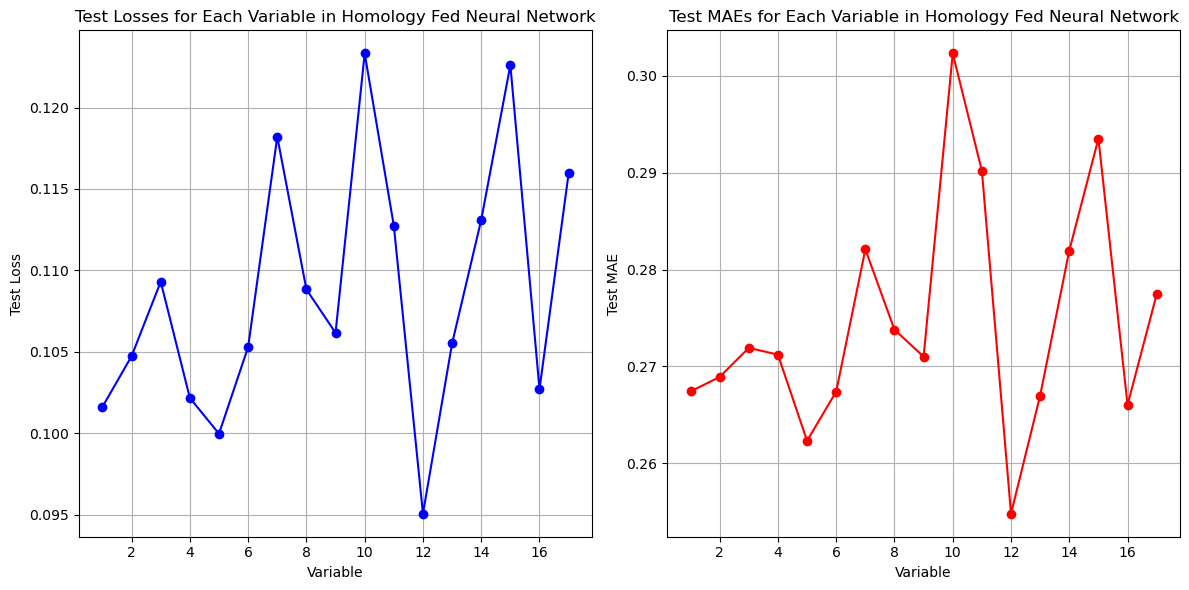

In [11]:
import matplotlib.pyplot as plt

# List of variable indices
variables = list(range(1, num_variables + 1))

# Plot Test Losses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(variables, test_losses, marker='o', linestyle='-', color='b')
plt.title('Test Losses for Each Variable in Homology Fed Neural Network')
plt.xlabel('Variable')
plt.ylabel('Test Loss')
plt.grid(True)

# Plot Test MAEs
plt.subplot(1, 2, 2)
plt.plot(variables, test_maes, marker='o', linestyle='-', color='r')
plt.title('Test MAEs for Each Variable in Homology Fed Neural Network')
plt.xlabel('Variable')
plt.ylabel('Test MAE')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()